# Lab Assignment Four: Multi-Layer Perceptron

### Authors
- Juliana Antonio
- Xiaona Hang
- Chuanqi Deng


### 1. Load, Split, and Balance 


#### 1.1 Load Dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/acs2017_census_tract_data.csv')
print('Unaltered data shape:',data.shape)

data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
print('Fixed data shape:', data.shape)

data.drop(columns=['TractId', 'County'], inplace=True)
data.head()

Unaltered data shape: (74001, 37)
Fixed data shape: (72718, 37)


,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,Alabama,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,Alabama,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,Alabama,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,Alabama,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


We will remove the 'county' column, to simplify the model to make it more interpretable. It also will reduce the overfitting risk that occurs with adding too many categorical variables. The 'TractId' column was also removed since it is irrelevant for the classification task.  

In [2]:
# encode string data
label_encoder = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = label_encoder.fit_transform(data[column])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             72718 non-null  int64  
 1   TotalPop          72718 non-null  int64  
 2   Men               72718 non-null  int64  
 3   Women             72718 non-null  int64  
 4   Hispanic          72718 non-null  float64
 5   White             72718 non-null  float64
 6   Black             72718 non-null  float64
 7   Native            72718 non-null  float64
 8   Asian             72718 non-null  float64
 9   Pacific           72718 non-null  float64
 10  VotingAgeCitizen  72718 non-null  int64  
 11  Income            72718 non-null  float64
 12  IncomeErr         72718 non-null  float64
 13  IncomePerCap      72718 non-null  float64
 14  IncomePerCapErr   72718 non-null  float64
 15  Poverty           72718 non-null  float64
 16  ChildPoverty      72718 non-null  float64
 17

#### 1.2 Balance dataset

In [3]:
from sklearn.preprocessing import KBinsDiscretizer

k_bins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
data['ChildPovertyClass'] = k_bins.fit_transform(data[['ChildPoverty']])
data['ChildPovertyClass'] = data['ChildPovertyClass'].astype(int)
print(data['ChildPovertyClass'].value_counts())


ChildPovertyClass
3    18265
1    18220
2    18214
0    18019
Name: count, dtype: int64


#### 1.3 Split Dataset

In [4]:
X = data.drop(columns=['ChildPoverty', 'ChildPovertyClass'])
y = data['ChildPovertyClass']

# Split the dataset into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (58174, 34) (58174,)
Testing set shape: (14544, 34) (14544,)


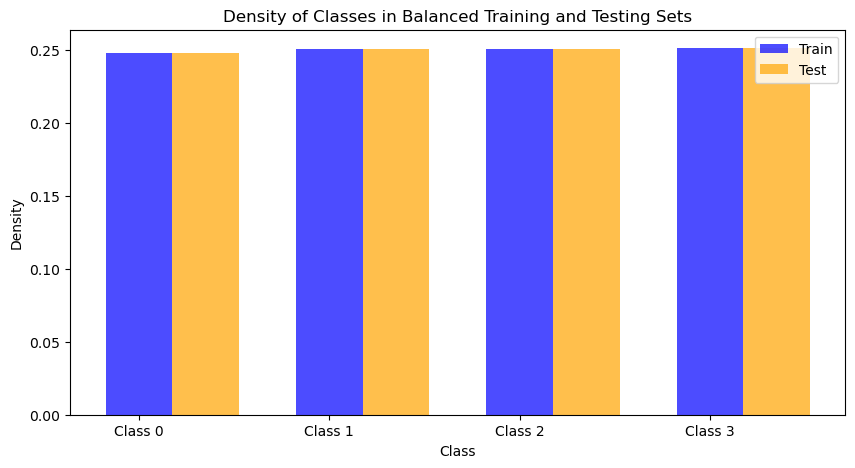

In [8]:
# Calculate the density of each class in the training set
train_class_density = y_train.value_counts(normalize=True).sort_index()

# Calculate the density of each class in the testing set
test_class_density = y_test.value_counts(normalize=True).sort_index()

# Create a bar plot to visualize the density of classes in the training and testing sets
plt.figure(figsize=(10, 5))
plt.bar(train_class_density.index, train_class_density.values, color='blue', alpha=0.7, label='Train', width=0.35)
plt.bar(test_class_density.index + 0.35, test_class_density.values, color='orange', alpha=0.7, label='Test', width=0.35)
plt.xlabel('Class')
plt.ylabel('Density')
plt.title('Density of Classes in Balanced Training and Testing Sets')
plt.xticks(range(4), ['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.legend()
plt.show()



The quantization method was chosen for balancing the dataset because it offers a straightforward approach to dividing the continuous "ChildPoverty" variable into four equal intervals, ensuring approximately equal representation of each class. This method avoids the need for complex sampling techniques and maintains the integrity of the original data distribution while achieving balance for classification tasks. Balancing the dataset for both the training and testing sets ensures that each class is represented proportionally, preventing bias in model training and providing a fair evaluation of the model's performance across all classes. This improves the model's ability to generalize well and accurately assess its performance on unseen data.

References:
1. https://www.kaggle.com/muonneutrino/us-census-demographic-data/data